In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [26]:
data = pd.read_csv("./output_data_combined.csv")
random_df = pd.read_csv("./output_data_random_case.csv", sep=';')
reversed_data = pd.read_csv("./output_data_reversed.csv")

## Plots for weighting method RANDOM with different weight ranges

### For normal graph (no cliques)

In [3]:
# normal graph
conditions  = [(random_df['WeightMin']==1) & (random_df['WeightMax']==100),
               (random_df['WeightMin']==1) & (random_df['WeightMax']==1000),
               (random_df['WeightMin']==100) & (random_df['WeightMax']==110)]
choices     = [ "[1, 100]", "[1, 1000]", "[100, 110]" ]   
random_df["WeightRange"] = np.select(conditions, choices, default=np.nan)
normal_df = random_df[random_df['SizeOfClique']==0]
clique_df = random_df[random_df['SizeOfClique']>0]

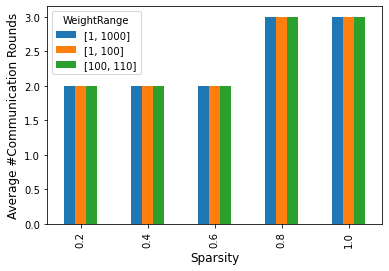

In [4]:
# Average nr of communication round per sparsity: RANDOM with various weight ranges
plot = pd.pivot_table(normal_df, values = 'NrOfCommRounds', index = 'Sparsity', columns = 'WeightRange',
               aggfunc = lambda x: np.mean(x)).plot.bar()
plot.set_ylabel("Average #Communication Rounds", size = 12)
plot.set_xlabel("Sparsity", size = 12);

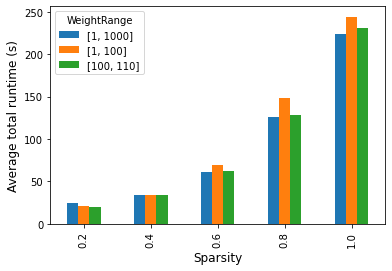

In [5]:
# Average nr of communication round per sparsity: RANDOM with various weight ranges
plot = pd.pivot_table(normal_df, values = 'TotalTime', index = 'Sparsity', columns = 'WeightRange',
               aggfunc = lambda x: np.mean(x)).plot.bar()
plot.set_ylabel("Average total runtime (s)", size = 12)
plot.set_xlabel("Sparsity", size = 12);

### For graph with cliques

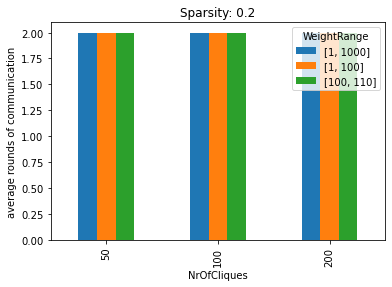

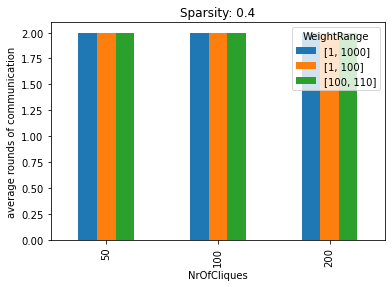

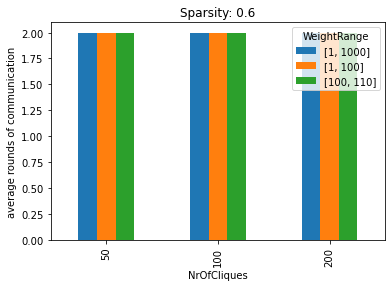

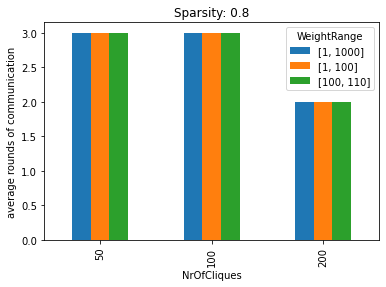

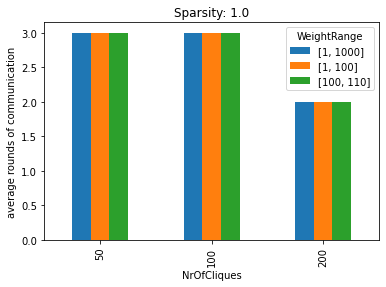

In [6]:
# Avg com. rounds for each weight range per NrOfCliques for each sparsity
sparsities = [0.2, 0.4, 0.6, 0.8, 1.0]
plot_data = [0]*5
plot = [0]*5

for i in range(len(sparsities)):
    plot_data[i] = clique_df[clique_df["Sparsity"] == sparsities[i]]
    plot_data[i] = pd.pivot_table(plot_data[i], values = 'NrOfCommRounds', index = 'NrOfCliques', columns = 'WeightRange',
               aggfunc = lambda x: np.mean(x)).plot.bar()
    plot_data[i].set_title("Sparsity: " + str(sparsities[i]))
    plot_data[i].set_ylabel("average rounds of communication");

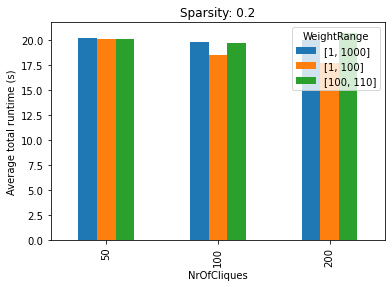

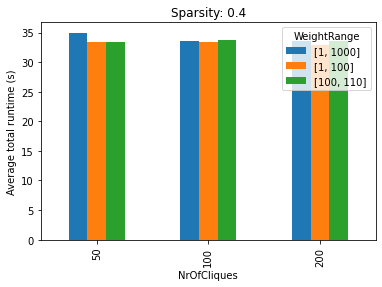

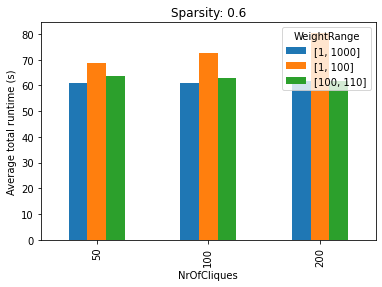

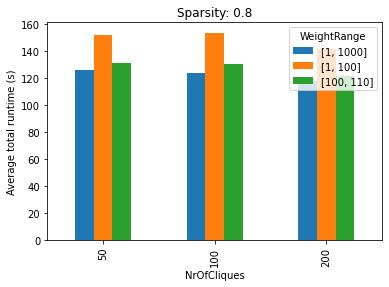

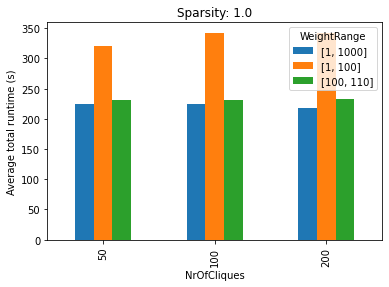

In [7]:
# Avg total runtime for each weight range per NrOfCliques for each sparsity
sparsities = [0.2, 0.4, 0.6, 0.8, 1.0]
plot_data = [0]*5
plot = [0]*5

for i in range(len(sparsities)):
    plot_data[i] = clique_df[clique_df["Sparsity"] == sparsities[i]]
    plot_data[i] = pd.pivot_table(plot_data[i], values = 'TotalTime', index = 'NrOfCliques', columns = 'WeightRange',
               aggfunc = lambda x: np.mean(x)).plot.bar()
    plot_data[i].set_title("Sparsity: " + str(sparsities[i]))
    plot_data[i].set_ylabel("Average total runtime (s)");

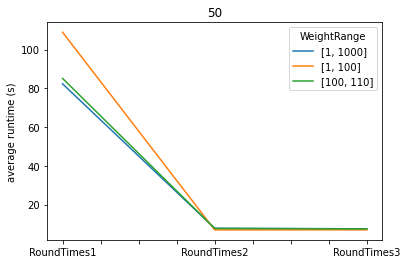

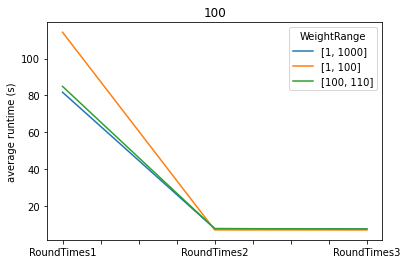

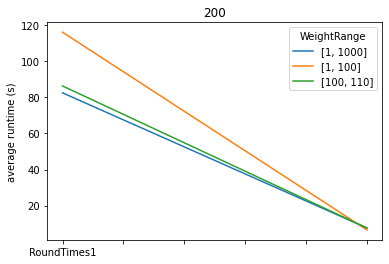

In [8]:
# Average round runtime per clique per method (i.e. sparsities are grouped)
clique_nums = [50, 100, 200]
plot_data = [0]*3
plot = [0]*3

for i in range(len(clique_nums)):
    plot_data[i] = clique_df[clique_df["NrOfCliques"] == clique_nums[i]]
    plot_data[i] = plot_data[i][["WeightRange", "RoundTimes1", "RoundTimes2", "RoundTimes3"]].groupby("WeightRange").mean()
    plot_data[i] = plot_data[i].swapaxes(0, 1)
    plot[i] = plot_data[i].plot(kind="line")
    plot[i].set_title(clique_nums[i])
    plot[i].set_ylabel("average runtime (s)");

## Plots for all weighting methods

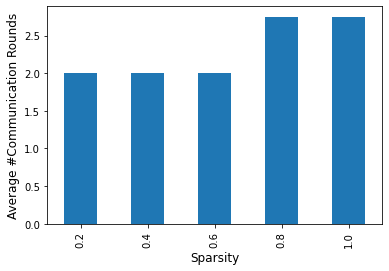

In [9]:
# Average nr of communication round per sparsity
plot = data.groupby("Sparsity")["NrOfCommRounds"].mean().plot(kind="bar")
plot.set_ylabel("Average #Communication Rounds", size = 12)
plot.set_xlabel("Sparsity", size = 12);

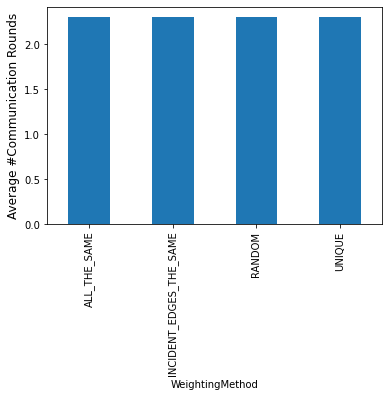

In [10]:
# Average nr of communication round per weighting method
plot = data.groupby("WeightingMethod")["NrOfCommRounds"].mean().plot(kind="bar")
plot.set_ylabel("Average #Communication Rounds", size = 12);

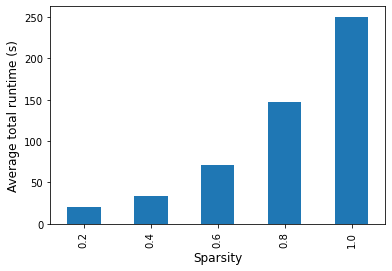

In [11]:
# Average total runtime per sparsity
plot = data.groupby("Sparsity")["TotalTime"].mean().plot(kind="bar")
plot.set_ylabel("Average total runtime (s)", size = 12)
plot.set_xlabel("Sparsity", size = 12);

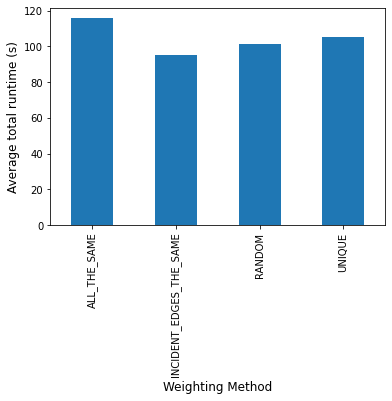

In [12]:
# Average total runtime per weightingmethod
plot = data.groupby("WeightingMethod")["TotalTime"].mean().plot(kind="bar")
plot.set_ylabel("Average total runtime (s)", size = 12)
plot.set_xlabel("Weighting Method", size = 12);

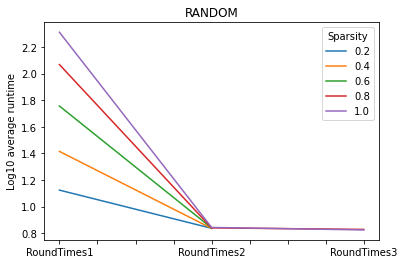

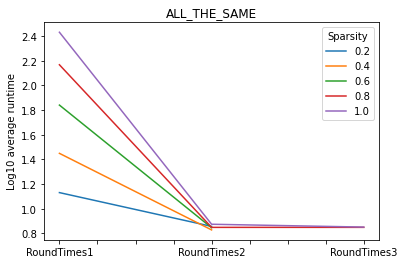

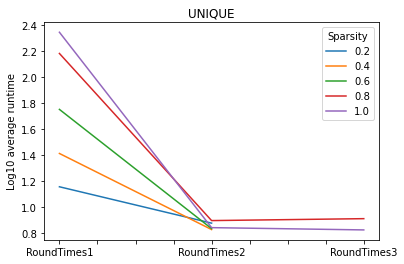

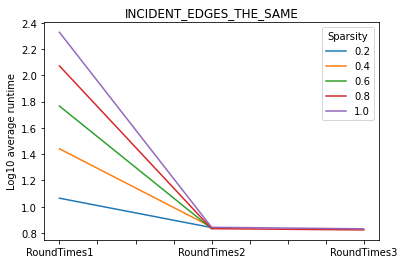

In [13]:
# Round time per sparsity per method without cliques
methods = ["RANDOM", "ALL_THE_SAME", "UNIQUE", "INCIDENT_EDGES_THE_SAME"]
plot_data = [0]*4
plot = [0]*4

for i in range(len(methods)):
    plot_data[i] = data[data["WeightingMethod"] == methods[i]]
    plot_data[i] = plot_data[i][plot_data[i]["SizeOfClique"] == 0]
    plot_data[i] = plot_data[i][["Sparsity", "RoundTimes1", "RoundTimes2", "RoundTimes3"]].groupby("Sparsity").mean()
    plot_data[i] = np.log10(plot_data[i].swapaxes(0, 1))
    plot[i] = plot_data[i].plot(kind="line")
    plot[i].set_title(methods[i])
    #plot.set_xlabel("Runtime per round")
    plot[i].set_ylabel("Log10 average runtime");

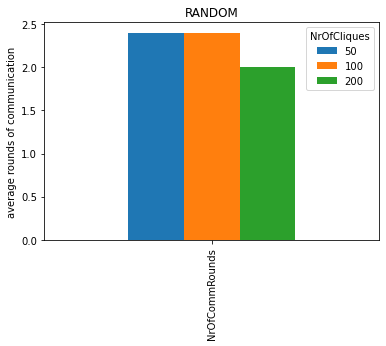

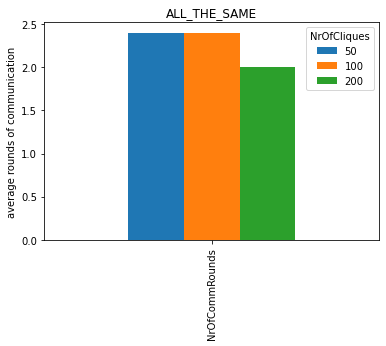

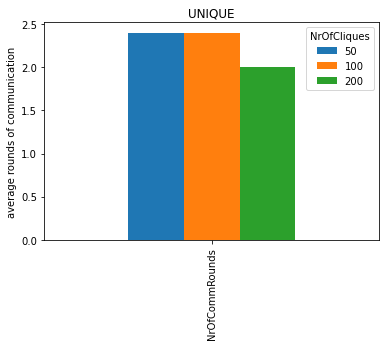

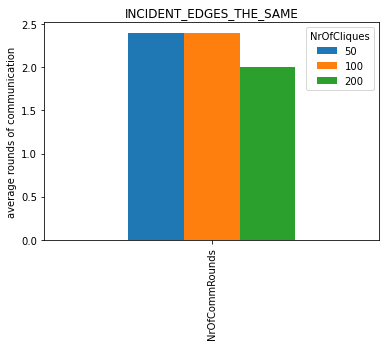

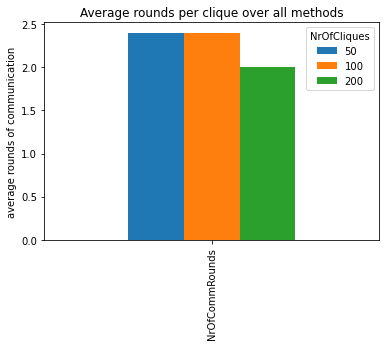

In [14]:
methods = ["RANDOM", "ALL_THE_SAME", "UNIQUE", "INCIDENT_EDGES_THE_SAME"]
plot_data = [0]*5
plot = [0]*5

for i in range(len(methods)):
    plot_data[i] = data[data["WeightingMethod"] == methods[i]]
    plot_data[i] = plot_data[i][plot_data[i]["SizeOfClique"] != 0]
    plot_data[i] = plot_data[i][["NrOfCliques", "NrOfCommRounds"]].groupby("NrOfCliques").mean()
    plot_data[i] = plot_data[i].swapaxes(0, 1)
    plot[i] = plot_data[i].plot(kind="bar")
    plot[i].set_title(methods[i])
    #plot.set_xlabel("Runtime per round")
    plot[i].set_ylabel("average rounds of communication");
    
plot_data[4] = data[data["SizeOfClique"] != 0]
plot_data[4] = plot_data[4][["NrOfCliques", "NrOfCommRounds"]].groupby("NrOfCliques").mean()
plot_data[4] = plot_data[4].swapaxes(0, 1)
plot[4] = plot_data[4].plot(kind="bar")
plot[4].set_title("Average rounds per clique over all methods")
#plot.set_xlabel("Runtime per round")
plot[4].set_ylabel("average rounds of communication");

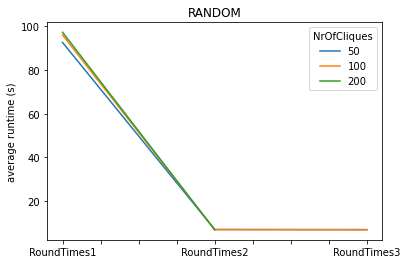

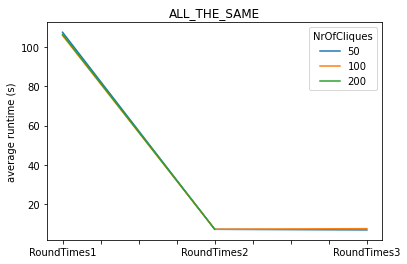

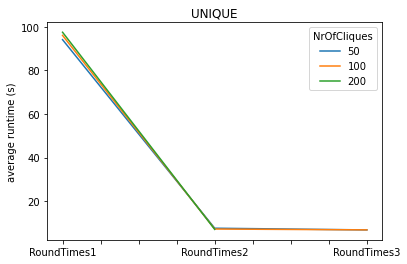

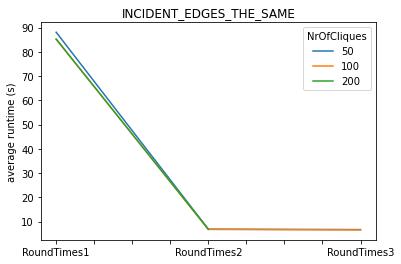

In [15]:
# Average round runtime per clique per method (i.e. sparsities are grouped)
methods = ["RANDOM", "ALL_THE_SAME", "UNIQUE", "INCIDENT_EDGES_THE_SAME"]
plot_data = [0]*4
plot = [0]*4

for i in range(len(methods)):
    plot_data[i] = data[data["WeightingMethod"] == methods[i]]
    plot_data[i] = plot_data[i][plot_data[i]["SizeOfClique"] != 0]
    plot_data[i] = plot_data[i][["NrOfCliques", "RoundTimes1", "RoundTimes2", "RoundTimes3"]].groupby("NrOfCliques").mean()
    plot_data[i] = plot_data[i].swapaxes(0, 1)
    plot[i] = plot_data[i].plot(kind="line")
    plot[i].set_title(methods[i])
    #plot.set_xlabel("Runtime per round")
    plot[i].set_ylabel("average runtime (s)");

## Plots for comparing the reversed to non-reversed methods

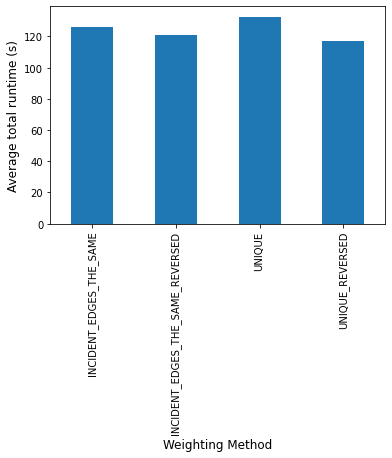

In [16]:
# Average total runtime per weightingmethod
plot = reversed_data.groupby("WeightingMethod")["TotalTime"].mean().plot(kind="bar")
plot.set_ylabel("Average total runtime (s)", size = 12)
plot.set_xlabel("Weighting Method", size = 12);

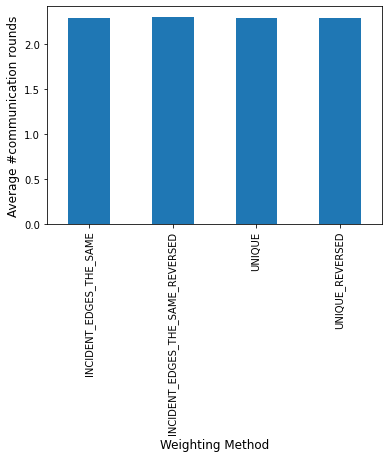

In [17]:
# Average total runtime per weightingmethod
plot = reversed_data.groupby("WeightingMethod")["NrOfCommRounds"].mean().plot(kind="bar")
plot.set_ylabel("Average #communication rounds", size = 12)
plot.set_xlabel("Weighting Method", size = 12);

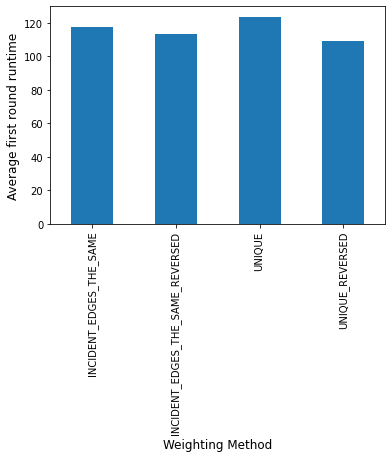

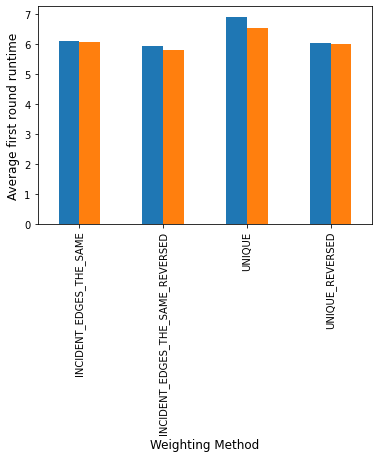

In [21]:
plot = reversed_data.groupby("WeightingMethod")[["RoundTimes1"]].mean().plot(kind="bar", legend=False)
plot.set_ylabel("Average first round runtime", size = 12)
plot.set_xlabel("Weighting Method", size = 12);

plot2 = reversed_data.groupby("WeightingMethod")[["RoundTimes2", "RoundTimes3"]].mean().plot(kind="bar", legend=False)
plot2.set_ylabel("Average first round runtime", size = 12)
plot2.set_xlabel("Weighting Method", size = 12);

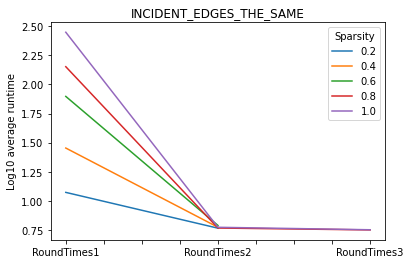

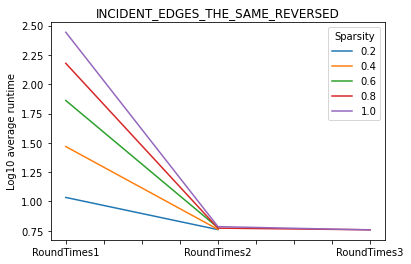

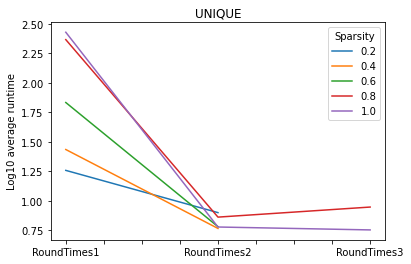

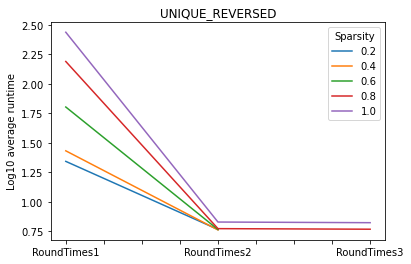

In [30]:
# Average round runtime per clique per method (i.e. sparsities are grouped)
methods = ["INCIDENT_EDGES_THE_SAME", "INCIDENT_EDGES_THE_SAME_REVERSED", "UNIQUE", "UNIQUE_REVERSED"]
plot_data = [0]*4
plot = [0]*4

plot_data = [0]*4
plot = [0]*4

for i in range(len(methods)):
    plot_data[i] = reversed_data[reversed_data["WeightingMethod"] == methods[i]]
    plot_data[i] = plot_data[i][plot_data[i]["SizeOfClique"] == 0]
    plot_data[i] = plot_data[i][["Sparsity", "RoundTimes1", "RoundTimes2", "RoundTimes3"]].groupby("Sparsity").mean()
    plot_data[i] = np.log10(plot_data[i].swapaxes(0, 1))
    plot[i] = plot_data[i].plot(kind="line")
    plot[i].set_title(methods[i])
    #plot.set_xlabel("Runtime per round")
    plot[i].set_ylabel("Log10 average runtime");